In [2]:
import yfinance as yf
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import date

In [3]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
period =  2*365
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data
data = load_data("GOOG")
data.tail()

C:\Users\SUFI\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2296,2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600
2297,2024-02-20,196.130005,198.600006,189.130005,193.759995,193.759995,104545800
2298,2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000
2299,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
2300,2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78670300


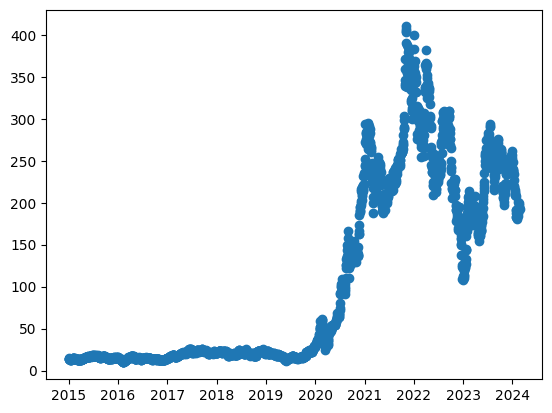

In [4]:
x=data.Date
y=data.Close
plt.scatter(x, y)
plt.show()

In [5]:
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})


In [6]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

19:14:36 - cmdstanpy - INFO - Chain [1] start processing
19:14:37 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\SUFI\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\SUFI\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


AttributeError: 'Figure' object has no attribute 'set_title'

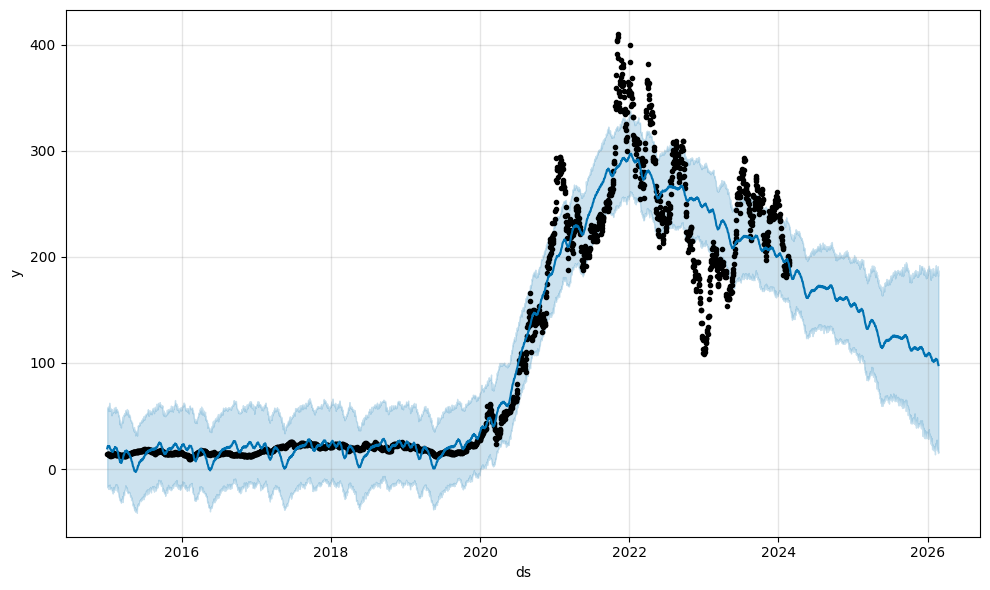

In [7]:

# Plot the forecast
fig = m.plot(forecast)

# Customize the plot (optional)
fig.set_title("Prophet Forecast")  # Set a title
fig.set_ylabel("Target Variable")  # Set a y-axis label

# Show the plot
plt.show()

In [2]:
from joblib import dump

In [3]:
dump(m,'./../savedModels/model.joblib')

NameError: name 'model' is not defined